# Regresión Lineal Múltiple

***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, incisos, datasets, tablas, parámetros y/o demás valores utilizados pueden no coincidir con los de la práctica.***


---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

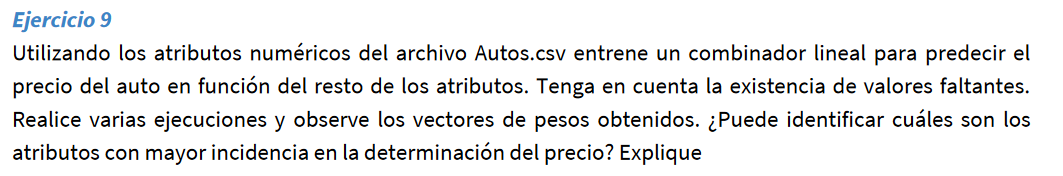

In [25]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = '../Datos/AUTOS.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
df


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


### Selección de atributos y asignación a valores nulos

<Axes: >

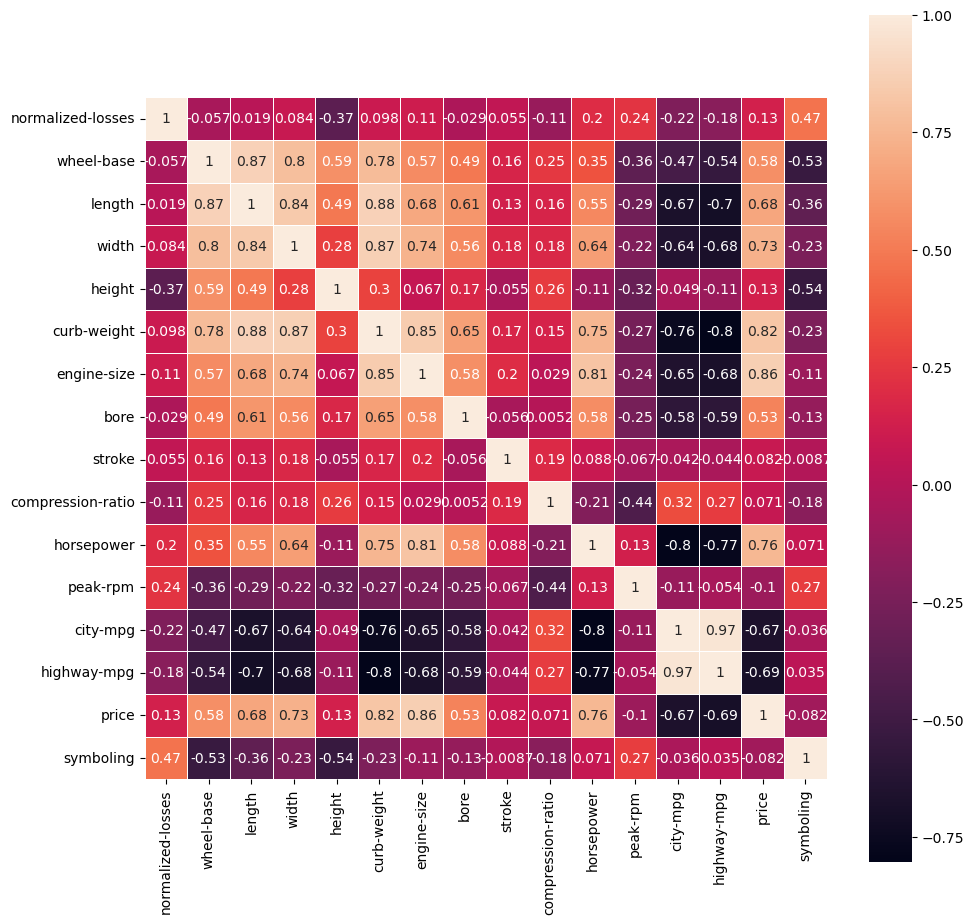

In [27]:
#-- seleccionar los atributos numéricos --
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
# imprime valores nulos
### print(df.isnull().sum())

nomAtrib = np.array(df.columns.values).reshape(-1,1)

#-- ver si tienen datos faltantes --
values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

# reemplaza valores nulos por los indicados en el diccionario values
df = df.fillna(value=values)
df
# Imprime matriz de correclacion
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, square=True,  annot=True, linewidths=.5)


Preparación de datos para entrenamiento de neurona

Normalización: 1


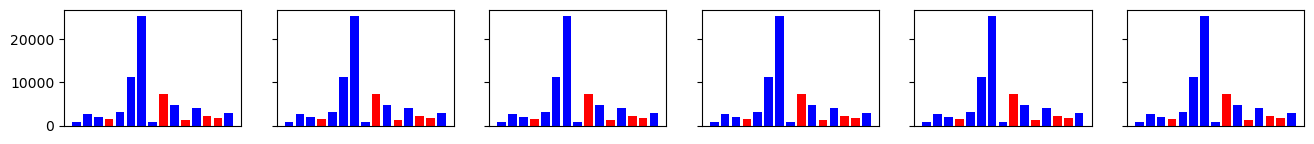

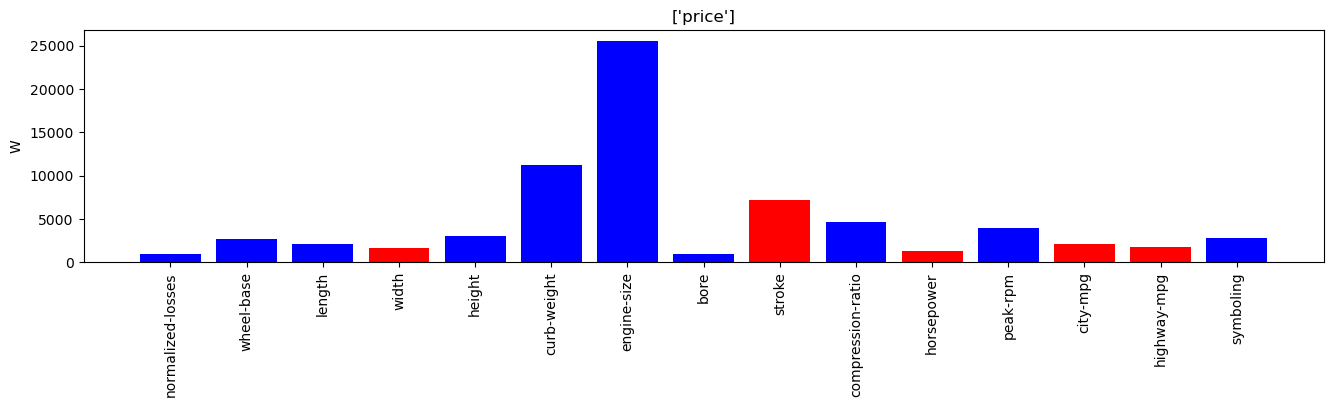

Normalización: 2


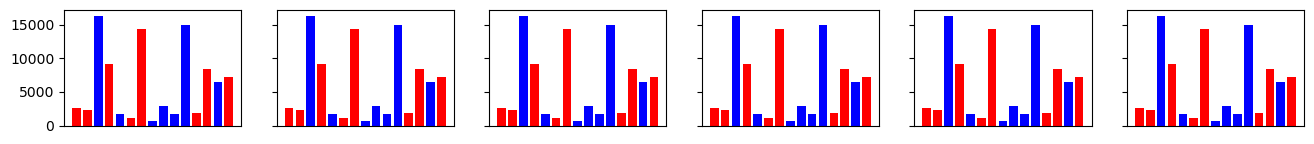

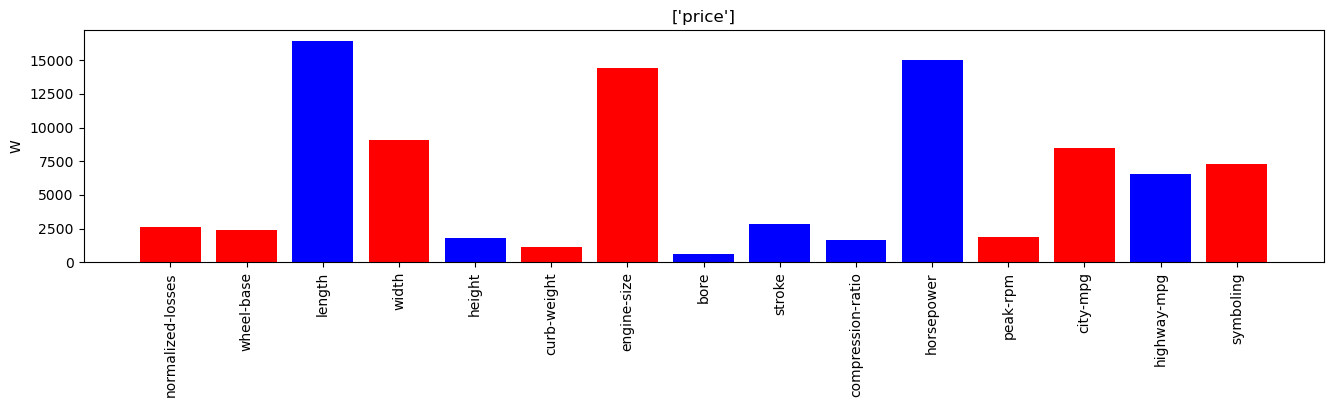

In [30]:
Ejemplos = np.array(df)

# separa aributos y target
attPred = 14 #12 mpg y 14 precio  #-- nro de atributo a predecir
T = Ejemplos[:, attPred].reshape(-1,1) # (N,) => (N,1)
T
Ejemplos = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1
nomPred = nomAtrib[attPred]
nomCols = np.delete(nomAtrib, [attPred])
alfa = 0.05
MAX_ITE = 200
CotaError = 10e-03
CANT_PLOTS = 6

for normalizarEntrada in [1, 2]:
    # normalización
    if normalizarEntrada == 1:
        normalizador = preprocessing.MinMaxScaler()
        X = normalizador.fit_transform(Ejemplos)
    elif normalizarEntrada == 2:
        normalizador = preprocessing.StandardScaler()
        X = normalizador.fit_transform(Ejemplos)
    else:
        X = Ejemplos

    w_acc = np.zeros(len(nomCols)) # acumulador para pesos

    fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))

    print('Normalización: %d' % normalizarEntrada)

    for i in range(0, CANT_PLOTS):
        modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
        modelo.fit(X, T)

        w_acc += modelo.w_ # acumula pesos para despues promediar

        # Colores para barras positivas y negativas. La idea es dibujarlas positivas
        # para comparar la magnitud y pintar de otro color las negativas
        colores = ['blue' if valor >= 0 else 'red' for valor in  modelo.w_]
        subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
        subs[i].set_xticks([])

    w_prom = w_acc / CANT_PLOTS

    # Colores para barras positivas y negativas
    colores = ['blue' if valor >= 0 else 'red' for valor in w_prom]

    barras = np.abs(w_prom)
    plt.figure(figsize=(16,4))
    N=len(barras)

    plt.bar(np.arange(N), barras, color=colores)   # Gráfico de barras
    plt.title(nomPred)           # Colocamos el título
    plt.ylabel('W')
    plt.xticks(np.arange(N), nomCols, rotation='vertical')
    plt.subplots_adjust(bottom=0.3)
    plt.show()